# Tensor Basics
- Jackson Cown
- 6/7/22


- var_t indicates a tensor stored in CPU memory
- var_g indicates a tensor stored in GPU memory
- var_a indicates a NumPy array stored in CPU memory

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt

In [4]:
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [5]:
print(f'Cuda Available: {torch.cuda.is_available()}')

Cuda Available: True


## Creating Tensors

#### Starting with native lists

In [6]:
# Starting with a basic python list, then moving to torch tensors
a_list = [1.0, 2.0, 1.0]
print(f'Native Python List: {a_list}\n')

# List index syntax
print(f'First Element: {a_list[0]}')
print(f'Second Element: {a_list[1]}')
print(f'Third Element: {a_list[2]}')

# Update Python List
a_list[2] = 3.0
print(f'\nUpdated List: {a_list}')
print(f'Last Element: {a_list[-1]}')

Native Python List: [1.0, 2.0, 1.0]

First Element: 1.0
Second Element: 2.0
Third Element: 1.0

Updated List: [1.0, 2.0, 3.0]
Last Element: 3.0


#### Constructing our first tensors

In [7]:
# Basic torch tensor
a_tensor = torch.ones(3) # populate 1d tensor of size 3
print(f'Torch Tensor: {a_tensor}\n')

# Tensor index syntax - note that f-strings autoconvert to float
print(f'First Element: {a_tensor[0]}')
print(f'Second Element: {a_tensor[1]}')
print(f'Third Element: {a_tensor[2]}')

Torch Tensor: tensor([1., 1., 1.])

First Element: 1.0
Second Element: 1.0
Third Element: 1.0


In [8]:
# Once again, note how the behavior differs without the f-string syntax
print(a_tensor[1])
print(float(a_tensor[1]))

# Indexed assignment for tensors
a_tensor[2] = 2.0
print(f'\nUpdated Tensor: {a_tensor}')
print(f'Last Element: {a_tensor[-1]}')

tensor(1.)
1.0

Updated Tensor: tensor([1., 1., 2.])
Last Element: 2.0


#### Tensor Aside:
- PyTorch Tensors allow us to manipulate and maintain collections of floating-point numbers
- Tensors can be indexed similar to native Python lists but they function completely differently under the hood.
- They provide convenient structure for generating unique intermediate representations of data during the forward process
- Tensors are the fundamental building block of PyTorch. By mimicking the numpy API, they provide easy to use representations of floating-point data that allow for highspeed operations on contiguous memory.


- A few notable tensor capabilities:
    - Ability to perform fast operations on GPUs
    - Distribute operations on multiple devices or machines
    - Keep track of the computation graph that created the respective tensor, which is essential for AutoGrad


#### Essense of Tensors
- Torch tensors and numpy arrays are views over contiguous memory blocks containing *unboxed*C numeric types rather than Python objects.
    - Each element in a 32-bit (4-byte) float. (Most of the time)
    - Storing a 1D tensor of 1,000,000 float numbers will require exactly 4,000,000 contiguous bytes, plus a small overhead for metadata (such as dimensions and numeric type)

#### Example: List of coordinates to represent a geometrical object
- 2D triangle with vertices at coordinates (4, 1), (5, 3), and (2, 1).

In [9]:
# init points of triangle in a simple 1D tensor
points = torch.tensor([4.0, 1.0, 5.0, 3.0, 2.0, 1.0])
print(points)

# Getting coords of first point
print(f'First Point: {float(points[0]), float(points[1])}')

tensor([4., 1., 5., 3., 2., 1.])
First Point: (4.0, 1.0)


In [10]:
# init same points of triangle in a 2D tensor by passing in a list of lists
points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
print(points)

# Outputing the shape
print(f'\n2D array shape: {points.shape}')

tensor([[4., 1.],
        [5., 3.],
        [2., 1.]])

2D array shape: torch.Size([3, 2])


In [11]:
# init a multidimensional Tensor with zeros or ones
points = torch.zeros(3, 2)
print(points)

tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])


In [12]:
# Indexing multidimensional tensor
points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
print(points)
print(f'\nRow indexing: {points[0]}')
print(f'Column indexing: {points[:, 0]}')
print(f'Item indexing: {points[0, 1]}')

tensor([[4., 1.],
        [5., 3.],
        [2., 1.]])

Row indexing: tensor([4., 1.])
Column indexing: tensor([4., 5., 2.])
Item indexing: 1.0


#### Tensor views
- The output of tensor indexing presents another tensor that represents a different view of the same underlying data.
- This change of view avoid computationally wasteful operations, like copying the indexed elements to a new tensor.
- In the case of the row index example above, it returns a new 1D tensor with a size of 2, referencing the first row in the ```points``` tensor
- More on how tensors are stored and viewed later this chapter

### Indexing Tensors
- Reference

#### Native Python indexing

In [13]:
# init native python list
some_list = list(range(6))
print('List of Nums:')
print(some_list)

print(f'\nAll Elements: {some_list[:]}')
print(f'Elements 1 to 4 exclusive: {some_list[1:4]}')
print(f'Elements 1 to end of list inclusive: {some_list[1:]}')
print(f'Elements 0 to element 4 exclusive: {some_list[:4]}')
print(f'Elements 0 to last element exclusive: {some_list[:-1]}')
print(f'Elements 1 to 4 exclusive, steps of 2: {some_list[1:4:2]}')

List of Nums:
[0, 1, 2, 3, 4, 5]

All Elements: [0, 1, 2, 3, 4, 5]
Elements 1 to 4 exclusive: [1, 2, 3]
Elements 1 to end of list inclusive: [1, 2, 3, 4, 5]
Elements 0 to element 4 exclusive: [0, 1, 2, 3]
Elements 0 to last element exclusive: [0, 1, 2, 3, 4]
Elements 1 to 4 exclusive, steps of 2: [1, 3]


#### Torch Tensor Indexing
- PyTorch tensors use the same notation as native Python
- We can use range indexing for each of the tensor's dimensions

In [14]:
# using 2D tensor created earlier
print(points)

print(f'\nAll rows after the first: \n{points[1:]}')
print(f'\nAll rows after the first; all columns: \n{points[1:, :]}')
print(f'\nAll Rows after the first; first column: \n{points[1:, 0]}')
print(f'\nAdds a dimension of size 1, just like unsqueeze: \n{points[None]}')

tensor([[4., 1.],
        [5., 3.],
        [2., 1.]])

All rows after the first: 
tensor([[5., 3.],
        [2., 1.]])

All rows after the first; all columns: 
tensor([[5., 3.],
        [2., 1.]])

All Rows after the first; first column: 
tensor([5., 2.])

Adds a dimension of size 1, just like unsqueeze: 
tensor([[[4., 1.],
         [5., 3.],
         [2., 1.]]])


#### PyTorch also features a powerful form of indexing, called *advanced indexing*
- More on this next chapter

### Named Tensors
- The dimensions of a tensor typically represent something like pixel locations or color channels.
- When we want to index into a tensor, we need to remember the ordering of the dimesions and write our indexing accordingly.
- Keeping track of dimensions and their orders can be one of the more challenging aspects of PyTorch
    - Note: Yea I find this to be one of, if not, the most annoying aspect of programming in pytorch. It would be great to find a way to cope with these difficulties.
    

#### Image example
- Imagine we have a 3D tensor called img_t (image tensor stored in CPU memory)

In [15]:
# init a 5x5 image with 3 color channels
img_t = torch.randn(3, 5, 5) # Shape [channels, rows, columns]
# We want to convert it to grayscale img with 1 color channel / 3 identical color channels
weights = torch.tensor([0.2126, 0.7152, 0.0722])
print(weights.shape)
print(weights.unsqueeze(0).shape)
print(weights.unsqueeze(1).shape) # Demonstration of tensor unsqueeze behavior

torch.Size([3])
torch.Size([1, 3])
torch.Size([3, 1])


#### Naive methods of converting an image to grayscale

In [16]:
# batches
batch_t = torch.randn(2, 3, 5, 5) # Shape [batch, channels, rows, columns]
# Its important to make a distinction between the location of the batch and channels dimension. Sometimes the color channel
# is in the zero index and sometimes the batch is located at index 0

# I prefer to have the shape be [batch, channels, rows, columns]
# In order to generalize for either case, we can access the row and column indices from the back of the shape:
img_gray_naive = img_t.mean(-3)
batch_gray_naive = batch_t.mean(-3)
print(img_gray_naive.shape, batch_gray_naive.shape)

torch.Size([5, 5]) torch.Size([2, 5, 5])


#### Better way to convert to grayscale
- PyTorch allows us to multiply things that are the same shape, as well as shapes where one operand is of size 1 in a given dimension.
- It also appends leading dimensions of size 1 automatically.
    - This feature is called *broadcasting*.


- ```batch_t``` of shape (2, 3, 5, 5) is multiplied by ```unsqueezed_weights``` of shape (3, 1, 1) resulting in a tensor of shape (2, 3, 5, 5), from which we can then sum the third dimension from the end (the three channels):
    

In [17]:
print(weights.shape)
unsqueezed_weights = weights.unsqueeze(-1).unsqueeze_(-1)
print(unsqueezed_weights)
print(unsqueezed_weights.shape)

torch.Size([3])
tensor([[[0.2126]],

        [[0.7152]],

        [[0.0722]]])
torch.Size([3, 1, 1])


In [18]:
print(weights)
print(weights.shape)
print()
print(weights.unsqueeze(-1))
print(weights.unsqueeze(-1).shape)
print()
print(weights.unsqueeze(-1).unsqueeze(-1))
print(weights.unsqueeze(-1).unsqueeze(-1).shape)
print()
print(weights.unsqueeze(-1).unsqueeze_(-1))
print(weights.unsqueeze(-1).unsqueeze_(-1).shape)

tensor([0.2126, 0.7152, 0.0722])
torch.Size([3])

tensor([[0.2126],
        [0.7152],
        [0.0722]])
torch.Size([3, 1])

tensor([[[0.2126]],

        [[0.7152]],

        [[0.0722]]])
torch.Size([3, 1, 1])

tensor([[[0.2126]],

        [[0.7152]],

        [[0.0722]]])
torch.Size([3, 1, 1])


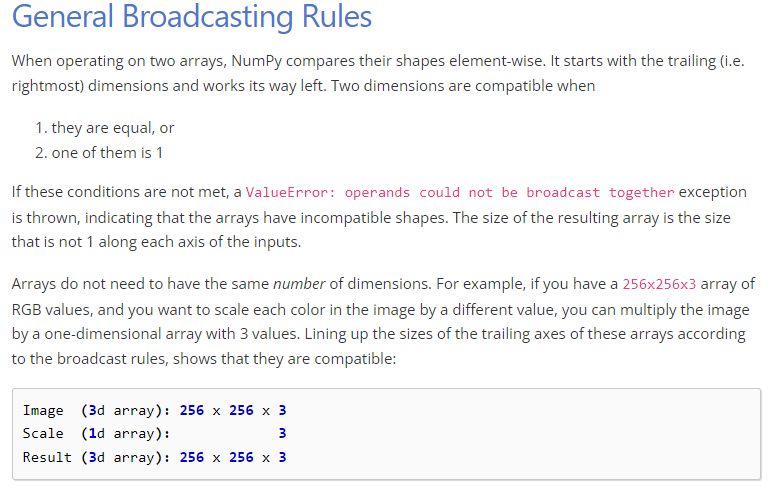

- torch tensors follow the same semantics and numpy arrays for broadcasting

In [19]:
# ok now im actually gonna convert to grayscale
unsqueezed_weights = weights.unsqueeze(-1).unsqueeze_(-1)
img_weights = (img_t * unsqueezed_weights)
batch_weights = (batch_t * unsqueezed_weights)
img_gray_weighted = img_weights.sum(-3) # Sum along color channel
batch_gray_weights = batch_weights.sum(-3)
#print(batch_weights.shape, batch_t.shape, unsqueezed_weights.shape)
print(f'Batch Weights Shape: {batch_weights.shape}')
print(f'Batch Shape: {batch_t.shape}')
print(f'Unsqueezed Weights Shape: {unsqueezed_weights.shape}')
print('\nunsqueezed_weights is compatible for element wise operations on both batch and single images') # Yea we printing

Batch Weights Shape: torch.Size([2, 3, 5, 5])
Batch Shape: torch.Size([2, 3, 5, 5])
Unsqueezed Weights Shape: torch.Size([3, 1, 1])

unsqueezed_weights is compatible for element wise operations on both batch and single images


#### Einstein Summation Function


In [20]:
a = torch.arange(6).reshape(2, 3)
print(a)
print(a.shape)

tensor([[0, 1, 2],
        [3, 4, 5]])
torch.Size([2, 3])


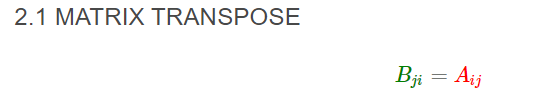

In [21]:
# Transpose
a_transpose = torch.einsum('ij->ji', a)
print(a_transpose)
print(a_transpose.shape)

tensor([[0, 3],
        [1, 4],
        [2, 5]])
torch.Size([3, 2])


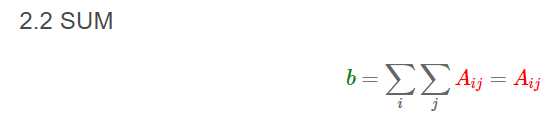

In [22]:
# Sum
a_sum = torch.einsum('ij->', a)
print(a_sum)
print(a_sum.shape)

tensor(15)
torch.Size([])


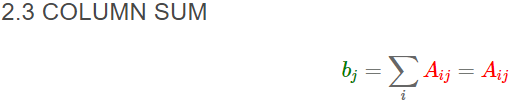

In [23]:
# Column sum
a_colsum = torch.einsum('ij->i', a)
print(a_colsum)
print(a_colsum.shape)

tensor([ 3, 12])
torch.Size([2])


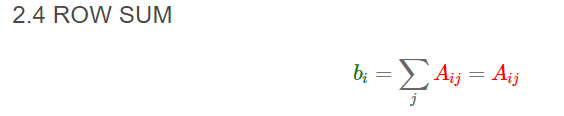

In [24]:
# Row sum
a_rowsum = torch.einsum('ij->j', a)
print(a_rowsum)
print(a_rowsum.shape)

tensor([3, 5, 7])
torch.Size([3])


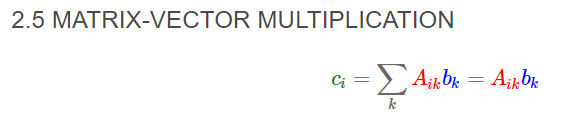

In [25]:
# Matrix vector multiplication
b = torch.arange(3)
print(b)

print()

a_mul = torch.einsum('ik, k->i', a, b)
print(a_mul)
print(a_mul.shape)

tensor([0, 1, 2])

tensor([ 5, 14])
torch.Size([2])


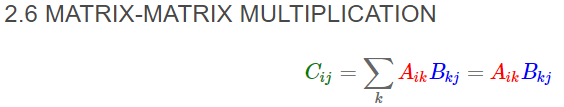

In [26]:
# Matrix matrix multiplication
c = torch.arange(15).reshape(3,5)
print(a.shape, c.shape)

print()

a_matmul = torch.einsum('ik, kj->ij', a, c)
print(a_matmul)
print(a_matmul.shape)

torch.Size([2, 3]) torch.Size([3, 5])

tensor([[ 25,  28,  31,  34,  37],
        [ 70,  82,  94, 106, 118]])
torch.Size([2, 5])


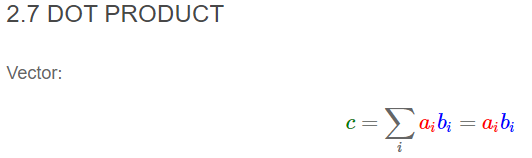

In [27]:
# Dot product
a_vector = torch.arange(3)
b_vector = torch.arange(3, 6) # Vector length 3 containing up to 6 exclusive
print(a_vector)
print(b_vector)

print()

a_dot = torch.einsum('i, i->', a_vector, b_vector)
print(a_dot)


tensor([0, 1, 2])
tensor([3, 4, 5])

tensor(14)


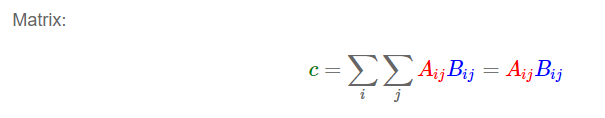

In [28]:
# Matrix dot product
b = torch.arange(6,12).reshape(2, 3)
print(a, '\n')
print(b, '\n')

a_matdot = torch.einsum('ij, ij->', a, b)
print(a_matdot)

tensor([[0, 1, 2],
        [3, 4, 5]]) 

tensor([[ 6,  7,  8],
        [ 9, 10, 11]]) 

tensor(145)


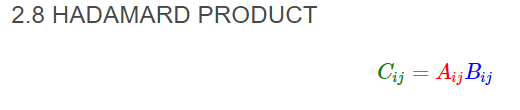

In [29]:
# Hadamard Product
a_hadamard = torch.einsum('ij, ij->ij', a, b)
print(a_hadamard)

tensor([[ 0,  7, 16],
        [27, 40, 55]])


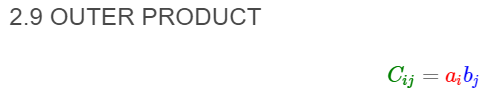

In [30]:
# Outer Product
print(a_vector, '\n')
print(b_vector, '\n')

a_outer = torch.einsum('i, j->ij', a_vector, b_vector)
print(a_outer)

tensor([0, 1, 2]) 

tensor([3, 4, 5]) 

tensor([[ 0,  0,  0],
        [ 3,  4,  5],
        [ 6,  8, 10]])


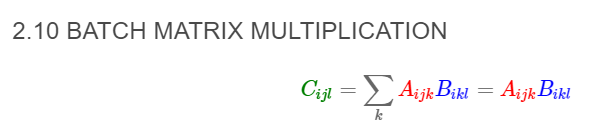

In [31]:
# Batch Matrix Multiplication
a_batch = torch.randn(3, 2, 5)
b_batch = torch.randn(3, 5, 3)
print(a_batch)
print(a_batch.shape, '\n')
print(b_batch)
print(b_batch.shape, '\n')

a_batchmul = torch.einsum('ijk, ikl->ijl', a_batch, b_batch)
print(a_batchmul)
print(a_batchmul.shape)

tensor([[[-0.6051, -0.0862,  1.6353,  0.1652, -0.4355],
         [ 0.8858, -1.0145, -1.0030,  0.1738,  0.6732]],

        [[-0.6320, -0.8165, -0.5107, -0.2458,  0.3113],
         [-0.9841,  1.3232,  0.3671, -0.3560,  0.7371]],

        [[ 0.3139, -0.6715,  1.2516,  0.0695, -1.5187],
         [-1.3908,  1.2496, -0.3872,  1.3662,  0.1783]]])
torch.Size([3, 2, 5]) 

tensor([[[ 1.1995, -1.5869, -1.4484],
         [ 0.8316,  0.3894,  0.1681],
         [-1.7846, -0.3605,  0.8054],
         [ 0.8843,  0.4662,  1.7774],
         [ 0.2646, -0.3099, -0.0305]],

        [[-0.5558, -0.8479, -0.6455],
         [-1.2784, -0.3630,  0.1078],
         [-0.5196,  1.3955, -0.4097],
         [-0.2447,  1.8690,  0.5272],
         [-0.7788,  0.3747, -0.4393]],

        [[ 1.0190, -0.7333,  0.0635],
         [ 1.3880, -0.2514, -0.6949],
         [ 1.0774,  1.4195,  0.8012],
         [ 1.1227, -0.5615, -1.1497],
         [-0.0864,  0.9418,  0.5178]]])
torch.Size([3, 5, 3]) 

tensor([[[-3.6850,  0.5491,  2.485

In [37]:
# Einsum for making gray image
img_gray_weighted_fancy = torch.einsum('...chw, c->...hw', img_t, weights)
print(img_gray_weighted_fancy)
print(img_gray_weighted_fancy.shape, '\n')

# Einsum for collapsing channel dimension with weights
batch_gray_weighted_fancy = torch.einsum('...chw, c->...hw', batch_t, weights)
print(batch_gray_weighted_fancy)
print(batch_gray_weighted_fancy.shape, '\n')

tensor([[-1.3157, -0.1408, -1.0780,  1.1764, -0.6659],
        [ 1.2547, -1.5619,  1.5806, -0.8269,  0.2320],
        [-0.7949, -0.6535, -0.2229, -0.8590, -1.4069],
        [ 0.1547, -0.8630, -0.3894, -1.0762,  0.3659],
        [-0.5927,  0.8793, -0.5945, -0.0228,  1.2595]])
torch.Size([5, 5]) 

tensor([[[ 1.5581, -1.7106, -1.2660, -0.2895, -1.5028],
         [-0.4363, -0.4630,  0.7001, -0.3188,  1.2961],
         [ 0.0252, -0.2465, -0.0400,  0.7709,  0.9173],
         [ 0.2314,  0.2404, -0.5390, -1.5602,  0.3119],
         [ 0.1370, -0.4181, -1.6874,  0.0759,  1.0301]],

        [[-0.2299, -0.0041, -0.1931, -0.3491, -0.1355],
         [-0.7997,  0.2150, -0.0206, -1.4462,  1.2097],
         [-0.6970, -1.1173,  0.4360, -0.0616,  0.7243],
         [-0.1251, -0.2123, -1.3574, -0.0101,  0.5956],
         [-0.0876, -0.7872,  0.7297, -0.7987,  0.6343]]])
torch.Size([2, 5, 5]) 



In [40]:
# Named Tensors
weights_named = torch.tensor([0.2126, 0.7152, 0.0722], names=('channels',))
print(weights_named)
print(weights_named.shape)

tensor([0.2126, 0.7152, 0.0722], names=('channels',))
torch.Size([3]) 



In [45]:
# We can add a name to an existing tensor with the refine_names() function
img_named = img_t.refine_names(..., 'channels', 'rows', 'columns')
print(img_named)
print(img_named.shape, '\n')

batch_named = batch_t.refine_names(..., 'channels', 'rows', 'columns')
print(batch_named)
print(batch_named.shape)

tensor([[[-0.5922, -0.2381,  0.5419,  0.5904, -0.8314],
         [-0.3323, -0.6116,  1.1729, -1.2877, -0.2341],
         [ 0.4572,  0.1588, -0.2587,  1.3680, -3.2099],
         [ 1.4218, -1.0187, -0.9154, -0.0442,  0.5682],
         [-0.9355,  0.8880, -0.5391, -0.0806, -0.7704]],

        [[-1.7058, -0.0295, -1.6517,  1.4102, -0.6704],
         [ 1.8816, -2.2414,  1.7451, -0.8311,  0.4881],
         [-1.3588, -1.0116, -0.2102, -1.6629, -0.9700],
         [-0.1743, -1.0151, -0.2158, -1.4862,  0.3765],
         [-0.6072,  1.0190, -0.7400,  0.1345,  2.1095]],

        [[ 0.4189, -0.9574, -0.1640,  0.5867, -0.1338],
         [-0.2822,  2.3710,  1.1510,  0.5709, -0.9332],
         [ 1.1038,  0.5015, -0.2436,  0.5468, -0.4255],
         [-0.3172,  1.1028, -0.5605, -0.0526, -0.3350],
         [ 0.5599, -0.5301,  0.6831, -1.4100, -1.1826]]],
       names=('channels', 'rows', 'columns'))
torch.Size([3, 5, 5]) 

tensor([[[[ 5.9240e-01, -1.2329e+00,  3.1788e-01,  2.8797e-01,  4.7813e-01],
       

In [51]:
# Aligning weights with img dimension using align_as
weights_aligned = weights_named.align_as(img_named)
print(weights_named.shape)
print(weights_aligned)
print(weights_aligned.shape)
# Aligning automatically expands the dimensions for for broadcasting

torch.Size([3])
tensor([[[0.2126]],

        [[0.7152]],

        [[0.0722]]], names=('channels', 'rows', 'columns'))
torch.Size([3, 1, 1])


In [52]:
# Computing gray image
gray_named = (img_named * weights_aligned).sum('channels')
print(gray_named)
print(gray_named.shape)

tensor([[-1.3157, -0.1408, -1.0780,  1.1764, -0.6659],
        [ 1.2547, -1.5619,  1.5806, -0.8269,  0.2320],
        [-0.7949, -0.6535, -0.2229, -0.8590, -1.4069],
        [ 0.1547, -0.8630, -0.3894, -1.0762,  0.3659],
        [-0.5927,  0.8793, -0.5945, -0.0228,  1.2595]],
       names=('rows', 'columns'))
torch.Size([5, 5])


If we want to use named tensors outside of functions that operate only on named tensors, drop the names by renaming them to ```None```.

In [54]:
gray_plain = gray_named.rename(None)
print(gray_plain)
print(gray_plain.shape)
print(gray_plain.names)

tensor([[-1.3157, -0.1408, -1.0780,  1.1764, -0.6659],
        [ 1.2547, -1.5619,  1.5806, -0.8269,  0.2320],
        [-0.7949, -0.6535, -0.2229, -0.8590, -1.4069],
        [ 0.1547, -0.8630, -0.3894, -1.0762,  0.3659],
        [-0.5927,  0.8793, -0.5945, -0.0228,  1.2595]])
torch.Size([5, 5])
(None, None)


#### Managing Tensor Datatype
- Default constructor dtype is float32

In [59]:
# Specifying dtype
double_points = torch.ones(10, 2, dtype=torch.double)
print(double_points, '\n')

short_points = torch.tensor([[1, 2], [3, 4]], dtype=torch.short)
print(short_points, '\n')

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]], dtype=torch.float64) 

tensor([[1, 2],
        [3, 4]], dtype=torch.int16) 



In [64]:
# We can type cast them directly
double_points = torch.zeros(10, 2).double() # Direct conversion
short_points = torch.tensor([[1, 2], [3, 4]]).short()
print(double_points, '\n')
print(short_points, '\n')

tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]], dtype=torch.float64) 

tensor([[1, 2],
        [3, 4]], dtype=torch.int16) 



In [67]:
# We can also cast using the .to(dtype) method of the torch tensor class
double_points = torch.zeros(10, 2).to(torch.double)
short_points = torch.tensor([[1, 2], [3, 4]]).to(dtype=torch.short)
print(double_points, '\n')
print(short_points, '\n')

tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]], dtype=torch.float64) 

tensor([[1, 2],
        [3, 4]], dtype=torch.int16) 



#### Aside on the tensor.to() method
- ```to``` checks fif the conversion is necessary and, if so, does it
- The ```to``` method can also take additional arguments which will be discussed in Ch. 3.9

### The tensor API
- Vast majority of operations between tensors are available in the ```torch``` module and can be called as methods from tensor objects.

In [75]:
# Transpose
a = torch.arange(6).reshape(2, 3)
print(a, '\n')
a_transpose = a.transpose(0, 1)
print(a_transpose, '\n')

# or
a_transpose1 = torch.transpose(a, 0, 1)
print(a_transpose1)
# They are the same.

tensor([[0, 1, 2],
        [3, 4, 5]]) 

tensor([[0, 3],
        [1, 4],
        [2, 5]]) 

tensor([[0, 3],
        [1, 4],
        [2, 5]])


#### Tensor Operations
- http://pytorch.org/docs


- *Creation ops*: Constructors for tensors. ```ones```, ```from_numpy```
- *Indexing, slicing, joining, mutating ops*: Changing the shape, stride, or content of a tensor. ```tranpose```
- *Math ops*: Functions for manipulating the content of tensors through computations
    - *Pointwise ops*: Functions for obtaining a new tensor by applying a function to each element independently. ```abs```, ```cos```
    - *Reduction ops*: Functions for computing aggregate values by iterating through tensors. ```mean```, ```norm```
    - *Comparison ops*: Functions for evaluating numerical predicates over tensors. ```equal```, ```max```
    - *Spectral ops*: Functions for transforming in and operating in the frequency domain. ```stft```, ```hamming_window```
    - *Other operations*: Special Functions operating on vectors, ```cross```, or matrices, ```trace```.
    - *BLAS and LAPACK operations*: Functions following Basic Linear Algebra Subprograms (BLAS) specification for scalar, vector-vector, matrix-vector, and matrix-matrix operations.
- *Random sampling*: Functions for generating values by drawing randomly from probability distributions. ```randn```, ```normal```
- *Serialization*: Functions for saving and loading tensors. ```load```, ```save```
- *Parallelism*: Functions for controlling the number of threads for parallel CPU execution. ```set_num_threads```

### Tensors, scenic views of storage
- Tensors are contiguous chunks of memory managed by ```torch.Storage``` instances.
- A storage is a 1D array of numerical data: This is the contiguous block of memory containing containing numbers of a given type
- A PyTorch ```Tensor``` instance is a view of such a ```Storage``` instance that is capable of indexing into that storage using using an offset and per-dimension strides.
- Multiple Tensors can index the same storage even if they index the data differently
- The underlying memory is only allocated onces, yet alternate views of the data can be generated quickly regardless of the size of the data managed by the ```Storage``` instance

#### Indexing into storage

In [81]:
points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
print(points)
print(points.shape, '\n')
print(points.storage()) # Storage is a contiguous 1D Array

tensor([[4., 1.],
        [5., 3.],
        [2., 1.]])
torch.Size([3, 2]) 

 4.0
 1.0
 5.0
 3.0
 2.0
 1.0
[torch.FloatStorage of size 6]


In [83]:
# Indexing storage
points_storage = points.storage()
print(points_storage[0])

4.0
